<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Correlation-analysis-between-market-and-diversity" data-toc-modified-id="Correlation-analysis-between-market-and-diversity-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Correlation analysis between market and diversity</a></span><ul class="toc-item"><li><span><a href="#Case-1:-Correlation-beween-type-1-chart-(between-year-differences)-and-compustat-data" data-toc-modified-id="Case-1:-Correlation-beween-type-1-chart-(between-year-differences)-and-compustat-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Case 1: Correlation beween type 1 chart (between year differences) and compustat data</a></span><ul class="toc-item"><li><span><a href="#Case-1.1:-Correlation-between-distances-and-stdev-of-the-returns" data-toc-modified-id="Case-1.1:-Correlation-between-distances-and-stdev-of-the-returns-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Case 1.1: Correlation between distances and stdev of the returns</a></span></li><li><span><a href="#Case-1.2:-Correlation-between-distances-and-volume" data-toc-modified-id="Case-1.2:-Correlation-between-distances-and-volume-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Case 1.2: Correlation between distances and volume</a></span></li><li><span><a href="#Case-1.3:-Correlation-between-distances-and-returns" data-toc-modified-id="Case-1.3:-Correlation-between-distances-and-returns-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Case 1.3: Correlation between distances and returns</a></span></li><li><span><a href="#Conclusions-Case-1" data-toc-modified-id="Conclusions-Case-1-1.1.4"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>Conclusions Case 1</a></span></li></ul></li><li><span><a href="#Case-2:-Correlation-between-type-0-chart-(within-year-differences)-and-compustat-data" data-toc-modified-id="Case-2:-Correlation-between-type-0-chart-(within-year-differences)-and-compustat-data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Case 2: Correlation between type 0 chart (within-year differences) and compustat data</a></span><ul class="toc-item"><li><span><a href="#Case-2.1:-Correlation-between-distances-and-stdev-of-the-returns" data-toc-modified-id="Case-2.1:-Correlation-between-distances-and-stdev-of-the-returns-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Case 2.1: Correlation between distances and stdev of the returns</a></span></li><li><span><a href="#Case-2.2:-Correlation-between-distances-and-volume" data-toc-modified-id="Case-2.2:-Correlation-between-distances-and-volume-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Case 2.2: Correlation between distances and volume</a></span></li><li><span><a href="#Case-2.3:-Correlation-between-distances-and-returns" data-toc-modified-id="Case-2.3:-Correlation-between-distances-and-returns-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Case 2.3: Correlation between distances and returns</a></span></li></ul></li><li><span><a href="#Case-3:-Correlation-between-type-0-chart-(original,-no-differences)-and-compustat-data" data-toc-modified-id="Case-3:-Correlation-between-type-0-chart-(original,-no-differences)-and-compustat-data-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Case 3: Correlation between type 0 chart (original, no differences) and compustat data</a></span></li><li><span><a href="#$\chi^2$-Test-of-Independence" data-toc-modified-id="$\chi^2$-Test-of-Independence-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>$\chi^2$ Test of Independence</a></span></li></ul></li></ul></div>

**Preliminary Code**

This is needed to setup the notebook. To see the results, go directly to **Section 1**.

In [429]:
%pylab inline
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import numpy as np

Populating the interactive namespace from numpy and matplotlib


/home/marco/anaconda3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [430]:
def createGlobalChart(dd, label):
    """
    Create scatter plots to visualize the correlation between the avg - which depends on the type of chart 
    we want to produce - and three market statistics, i.e., mean volume, mean return, and stdev return.
    """
    dfLong=pd.melt(dd, id_vars=["cik", "year", "avg"], value_vars=["mean_return", "mean_volume", "sd_return"],
                   var_name="type_measure", value_name="val")
    dfLong.head()
    dfLong["mkt_measure"] = dfLong.type_measure.astype("category")
    dfLong.dtypes
    # create charts
    g = sns.FacetGrid(dfLong,col="mkt_measure", size=5,sharey=False)
    g = g.map(sns.regplot, "avg", "val", ci=False)
    plt.subplots_adjust(top=0.85)
    title = label + " and Market Performance"
    g.fig.suptitle(title)
    #return g.fig


In [431]:
def createChartPerCik(dd, mkt_type, avg_type, label):
    """
    Create a scatter plot for each company in the Cik set, using the average value from `dd` and the
    specified market statistic (defined in the variable `mkt_type`)
    """
    
    ciks = dd.groupby(["cik"]).size().keys()
    for cik in ciks:
        dAux = dd.groupby(["cik"]).get_group(cik)
        nn = dAux.shape[0]
        rr, pp = stats.pearsonr(dAux["avg"], dAux[mkt_type])
        print("r({0:8}) = {1:6.3f} -- p-value = {2:5.3f}\t [Nr. Observations = {3:2d}]".format(cik, rr, pp/2, nn))
    g = sns.lmplot(data=dd, x="avg", y=mkt_type, col="cik", ci=False, aspect=0.4, col_wrap=5,size=8,sharey=False)
    fig = g.fig
    fig.subplots_adjust(top=0.9)
    title = label + " vs Avg Diversity (type " + avg_type + ") "
    fig.suptitle(title ,size=16)
    #fig.show()
    #return fig

In [432]:
def printCorrelations(dd):
    """
    Print the correlation between the average value from `dd` and the three market statistcs defined below.
    """
    for tt in ["mean_return", "mean_volume", "sd_return"]:
        rr, pp = stats.pearsonr(dd["avg"], dd[tt])
        print("Correlation between mean distances and {0} \t= {1:6.3f} \t ({2:5.3f})\t".format(tt, rr, pp))

# Correlation analysis between market and diversity

We want to analyze whether any of the two measures of average distances is correlated with market performances.

Import files:
- `df0` contains the type 0 data, i.e., the average intra-year distances
- `df1` contains the type 1 data, i.e., the average variability over two consecutive years
- `comp` provides the compustat values for 5 of the 6 companies

In [433]:
df0 = pd.read_csv("profile0.csv")
df1 = pd.read_csv("profile1.csv")
comp = pd.read_stata("compustat.dta")
comp.head()
df0.head()
df0.columns.values
df0=df0.drop(['Unnamed: 0'],axis=1)
df1=df1.drop(['Unnamed: 0'],axis=1)
comp.head()

,tic,year,sd_return,mean_return,mean_volume,cik
0,CHK,1995.0,0.031800,0.004786,1.026123e+05,0000895126
1,CHK,1996.0,0.033250,0.004180,2.832791e+05,0000895126
2,CHK,1997.0,0.047644,-0.003954,1.075197e+06,0000895126
3,CHK,1998.0,0.059488,-0.006492,7.304968e+05,0000895126
4,CHK,1999.0,0.056820,0.005242,4.631448e+05,0000895126


We now have the three dataframes we need for this analysis: `df0`, `df1`, `comp`. We address the problem twice, merging `comp` with each of the two datasets.

## Case 1: Correlation beween type 1 chart (between year differences) and compustat data

First, merge the two dataset into a single data structure. We call the new dataframe `dd`.

In [434]:
comp["year"] = comp["year"].astype("int64")
comp["cik"] = comp["cik"].astype("int64")
dd = df1.merge(comp)
dd.head()

,avg,cik,tot,year,tic,sd_return,mean_return,mean_volume
0,0.260491,936402,5246,2012,SHPG,0.012457,0.000700,3.826591e+05
1,0.313476,936402,13330,2013,SHPG,0.015098,0.001830,4.542985e+05
2,0.283266,936402,13330,2014,SHPG,0.027183,0.002046,1.217114e+06
3,0.295967,936402,4644,2015,SHPG,0.018737,0.000043,7.671176e+05
4,0.340556,920148,14,1996,LH,0.036882,-0.003895,1.845618e+05


Let us have a look at the scatter plot that relates the average differences with some market values (return, volume, and stdev).

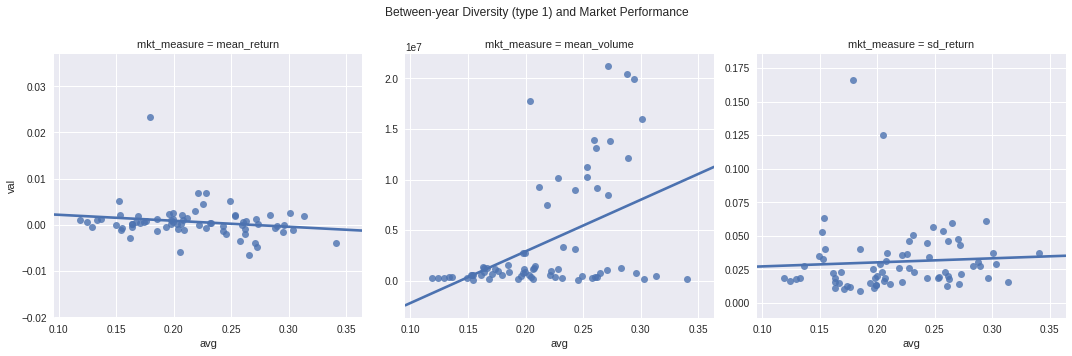

In [435]:
createGlobalChart(dd,label="Between-year Diversity (type 1)")

In [436]:
printCorrelations(dd)

Correlation between mean distances and mean_return 	= -0.184 	 (0.124)	
Correlation between mean distances and mean_volume 	=  0.460 	 (0.000)	
Correlation between mean distances and sd_return 	=  0.064 	 (0.595)	


From both the charts and the correlation tests above, we see that the strongest correlation is between the __average distances__ (difference in average distances within year between two consecutive years) and the __average volume__. The p-value ($5.46\times 10^{-1}$) indicates that such positive correlation is significant.

The correlation between distances and returns (as well as standard deviations) do not seem to be significant.

Below, we analyze the same correlations, dividing the data over the different companies.

### Case 1.1: Correlation between distances and stdev of the returns

We observe that, for two companies, the correlation is significant, especially in the case of 920148. Let us have a look at the charts, divided over companies. Note that, in reality, all of them present a positive correlation (including the first company, where a few outliers are "tilting" the regression line.) 

r(   20520) = -0.609 -- p-value = 0.018	 [Nr. Observations = 12]
r(  895126) =  0.313 -- p-value = 0.096	 [Nr. Observations = 19]
r(  920148) =  0.629 -- p-value = 0.001	 [Nr. Observations = 20]
r(  936402) =  0.094 -- p-value = 0.453	 [Nr. Observations =  4]
r( 1031203) =  0.031 -- p-value = 0.455	 [Nr. Observations = 16]


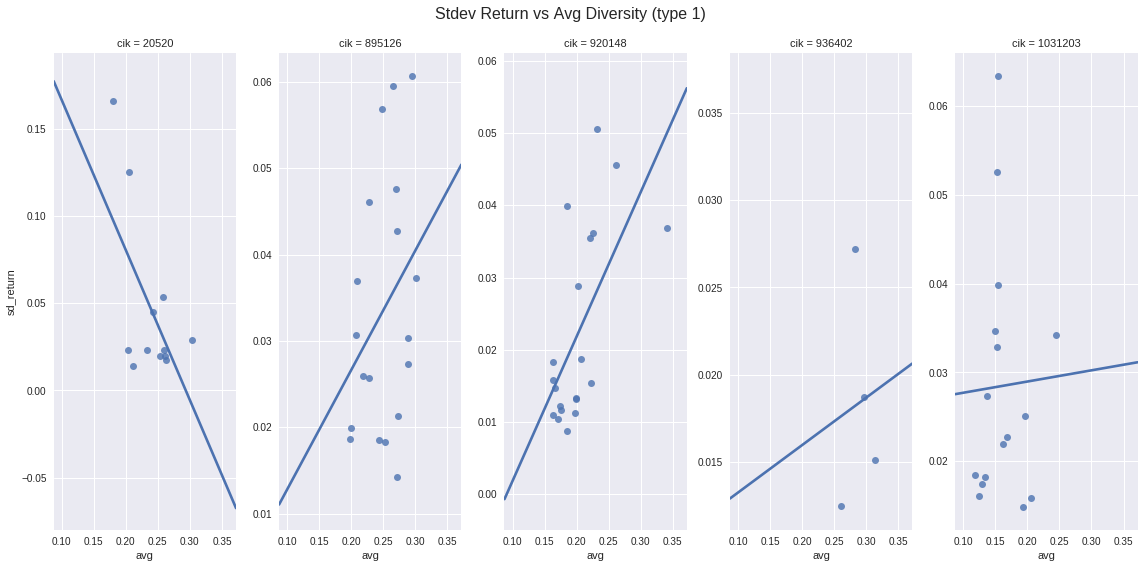

In [437]:
createChartPerCik(dd, mkt_type="sd_return", avg_type = "1", label="Stdev Return")

### Case 1.2: Correlation between distances and volume

We now repeat the analysis using the `mean_volume` variable. Note that, since volumes across companies change substantially, the values on the $y$ axes are not the same. These charts, as well as the correlation values, are a bit confusing. We find a significant correlation for two companies (895126 and 936402); however, in the first case the correlation is positive, while in the second it is negative.

r(   20520) = -0.002 -- p-value = 0.497	 [Nr. Observations = 12]
r(  895126) =  0.677 -- p-value = 0.001	 [Nr. Observations = 19]
r(  920148) = -0.719 -- p-value = 0.000	 [Nr. Observations = 20]
r(  936402) =  0.022 -- p-value = 0.489	 [Nr. Observations =  4]
r( 1031203) = -0.332 -- p-value = 0.104	 [Nr. Observations = 16]


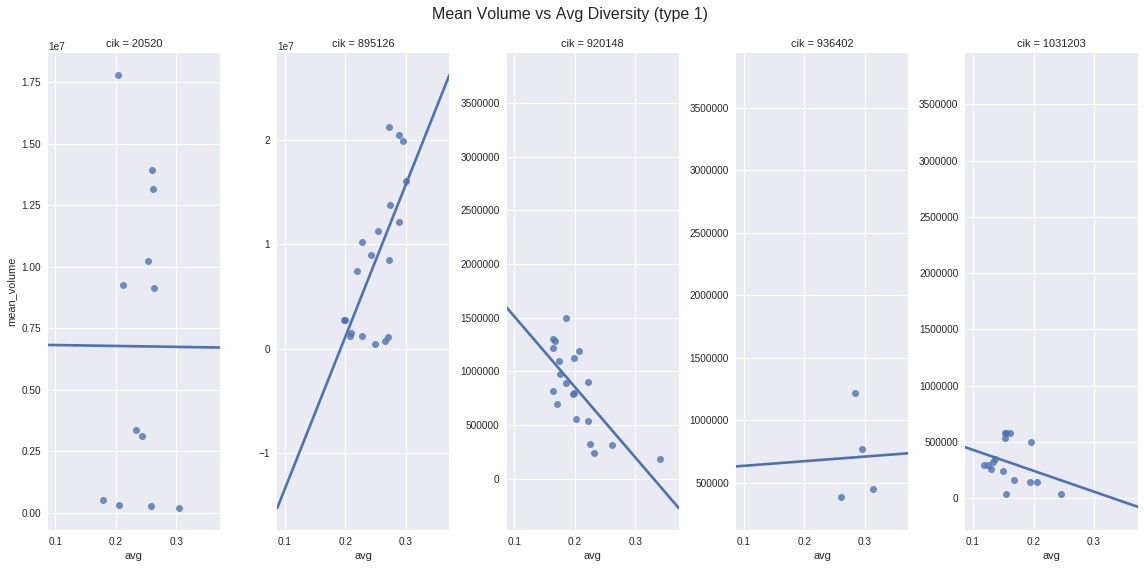

In [438]:
createChartPerCik(dd, mkt_type="mean_volume", avg_type="1", label="Mean Volume")

### Case 1.3: Correlation between distances and returns

From the charts below, there seems to be a mild negative correlation between the two (not much can be said conclusively, though). However, this is in line with what we have seen in case 1 (the three scatter plots, where companies are aggregated together. 

r(   20520) = -0.489 -- p-value = 0.053	 [Nr. Observations = 12]
r(  895126) = -0.321 -- p-value = 0.090	 [Nr. Observations = 19]
r(  920148) = -0.252 -- p-value = 0.142	 [Nr. Observations = 20]
r(  936402) =  0.262 -- p-value = 0.369	 [Nr. Observations =  4]
r( 1031203) = -0.240 -- p-value = 0.185	 [Nr. Observations = 16]


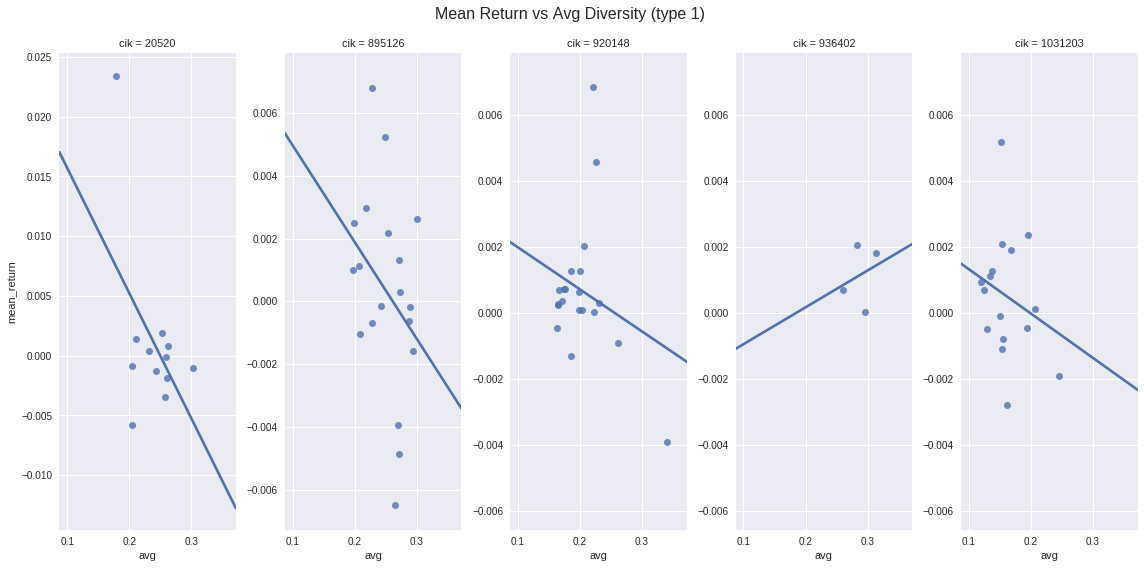

In [439]:
createChartPerCik(dd, mkt_type="mean_return", avg_type="1", label="Mean Return")

### Conclusions Case 1

I would attemp a potential explanation here as follows:
- there is a __positive correlation__ between diversity and standard deviation of the returns (both the global picture of case 1 and the detailed pictures of case 1.1 point in the same direction)
- there is a mild __negative correlation__ between diversity and mean return. It is mild, but it seems to be there. It is worth exploring a larger number of cases.
- there is not a clear correlation between diversity and volume. If we look at the global picture of case 1 (the scatter plot diversity-volume), we see that, despite we find a strong positive correlation, this positive trend seems to be due to some "outliers". If we take a look at the bulk of the data, the trenline seems to be flat. The same is conveyed by the individual pictures, divided over companies. We observe that some are positively correlated, while others are negatively correlated (i.e., there is no correlation). This needs to be investigated further.

## Case 2: Correlation between type 0 chart (within-year differences) and compustat data

We first need to create a new dataframe, in which we store the difference in average intra-year diversity for any two consecutive year. Let us create a new dataframe, in which we store the differences in averages per year, over two consecutive years. In other words, we take type 0 averages (intra-year averages), and we compute the difference over two consecutive years. This now resembles the type 1 chart, since rather than taking the average diversity within a year, we now work with the difference in average diversity over two consecutive years.

In [440]:
ciks = df0.groupby(["cik"]).size().keys()
avg = []
cik = []
tot = []
year = []
for cc in ciks:
    
    dAux = df0.groupby(["cik"]).get_group(cc)
    yearList = dAux.groupby(["year"]).size().keys()
    mm = np.mean(dAux["avg"])
    nrow = dAux.shape[0]
    for i in range(nrow-1):
        if dAux.iloc[i+1,3] - dAux.iloc[i,3] == 1:
            avg.append(dAux.iloc[i+1,0]-dAux.iloc[i,0])
        else:
            avg.append(mm-dAux.iloc[i,0])
        year.append(dAux.iloc[i+1,3])
        tot.append(dAux.iloc[i,2]*dAux.iloc[i+1,2])
        cik.append(cc)
        

df0diff = pd.DataFrame({
    "avg" : avg,
    "cik" : cik,
    "tot" : tot,
    "year": year
})
        
df0diff.head()
#df0diff.dtypes

,avg,cik,tot,year
0,-0.078421,20520,35.0,1998.0
1,-0.032432,20520,45.0,1999.0
2,-0.018764,20520,90.0,2000.0
3,-0.026381,20520,160.0,2001.0
4,0.070675,20520,224.0,2002.0


Let us now merge the two datasets, `df0diff` and `comp`, into a dataset called `dd`.

In [441]:
df0diff["year"] = df0diff["year"].astype("int64")
df0diff["cik"] = df0diff["cik"].astype("int64")
comp["year"] = comp["year"].astype("int64")
comp["cik"] = comp["cik"].astype("int64")
dd = df0diff.merge(comp)
dd.head()

,avg,cik,tot,year,tic,sd_return,mean_return,mean_volume
0,-0.078421,20520,35.0,1998,FTR,0.028754,-0.001037,1.952814e+05
1,-0.032432,20520,45.0,1999,FTR,0.053493,-0.003485,2.648714e+05
2,-0.018764,20520,90.0,2000,FTR,0.125138,-0.005818,3.351539e+05
3,-0.026381,20520,160.0,2001,FTR,0.165730,0.023410,5.156136e+05
4,0.027539,20520,525.0,2008,FTR,0.044672,-0.001251,3.109689e+06


First, we re-create here the type 0 charts where, rather than using the intra-year average diversity, we use the difference in intra-year average diversity. This is the new version of the type 0 chart.

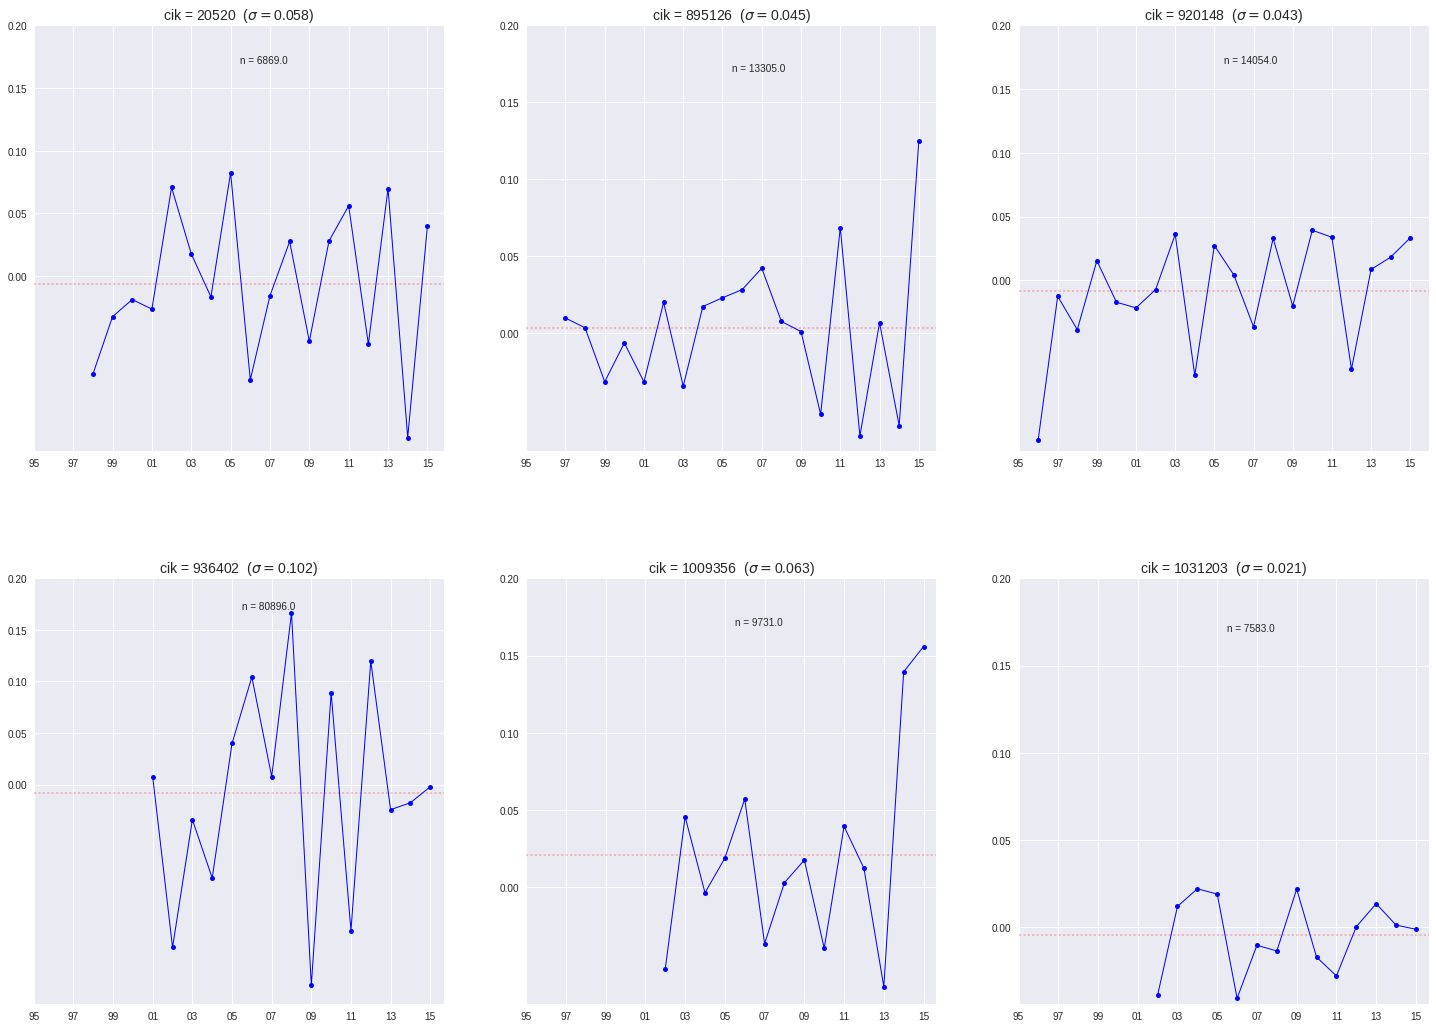

In [442]:
df = df0diff
task = "1"
minX  = df["year"].min()
maxX  = df["year"].max()
maxY  = df["avg"].max()
minY  = 0.0
nTot  = 6
ncols = 3
nrows = int(np.ceil(nTot / ncols))
f, axarr = plt.subplots(nrows,ncols,figsize=(25,18))
ix = 0
jx = 0

ciks = df.groupby(["cik"]).size().keys()
for cc in ciks:
    dfSub = df.groupby(["cik"]).get_group(cc)
    axarr[ix,jx].axhline(y=np.mean(dfSub["avg"]), linestyle=":", color="red",alpha=0.25)
    axarr[ix,jx].plot(dfSub["year"], dfSub["avg"], linestyle="-", marker="o", color="b",
    markersize=5, linewidth=1)
    fullTitle = "cik = " + str(cc) + str("  ($\sigma= $") + str(round(np.std(dfSub["avg"]),3)) + ")"
    axarr[ix,jx].set_title(fullTitle,fontsize=14)
    axarr[ix,jx].tick_params(axis = 'both', which = 'major', labelsize = 10)
    msg = "n = " + str(sum(dfSub["tot"]))
    axarr[ix,jx].annotate(msg, xy=((minX+maxX)/2,0.17),size=10)
    if (jx+1) % ncols == 0:
        jx  = 0
        ix += 1
    else:
        jx += 1

xx = ["95","97","99","01","03","05","07","09","11","13","15"]
xl = np.arange(1995,2016,2)
yy = np.arange(minY,maxY+0.05,0.05)
plt.setp(axarr,xticks=xl, xticklabels=xx, yticks=yy)

f.subplots_adjust(hspace=0.3)
#namefile = "chart_type" + task + ".png"
#plt.savefig(namefile)
plt.show()

Now we use these data to explore the correlation between distances and market values. We repeat the same analysis carried out for the type 1 chart: First, we have a look at the general relation with aggregated data: next, we explore the relation with respect to each company.

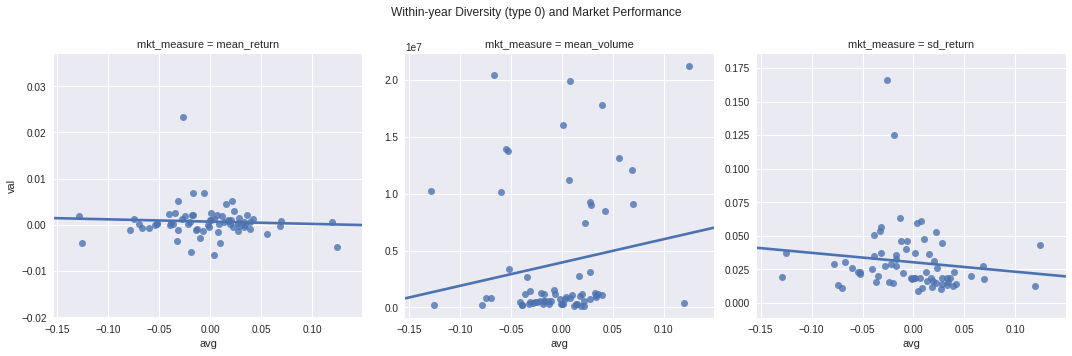

In [443]:
createGlobalChart(dd, label="Within-year Diversity (type 0)")

In [444]:
printCorrelations(dd)

Correlation between mean distances and mean_return 	= -0.061 	 (0.620)	
Correlation between mean distances and mean_volume 	=  0.160 	 (0.190)	
Correlation between mean distances and sd_return 	= -0.129 	 (0.292)	


From both the chart and the correlation values, it seems that no significan relation arises here. Let us now proceed with the study per company.

### Case 2.1: Correlation between distances and stdev of the returns

Nothing significant here (see both the picture and the correlation coefficients.)

r(   20520) = -0.092 -- p-value = 0.388	 [Nr. Observations = 12]
r(  895126) =  0.016 -- p-value = 0.474	 [Nr. Observations = 19]
r(  920148) = -0.315 -- p-value = 0.088	 [Nr. Observations = 20]
r(  936402) = -0.601 -- p-value = 0.200	 [Nr. Observations =  4]
r( 1031203) = -0.219 -- p-value = 0.226	 [Nr. Observations = 14]


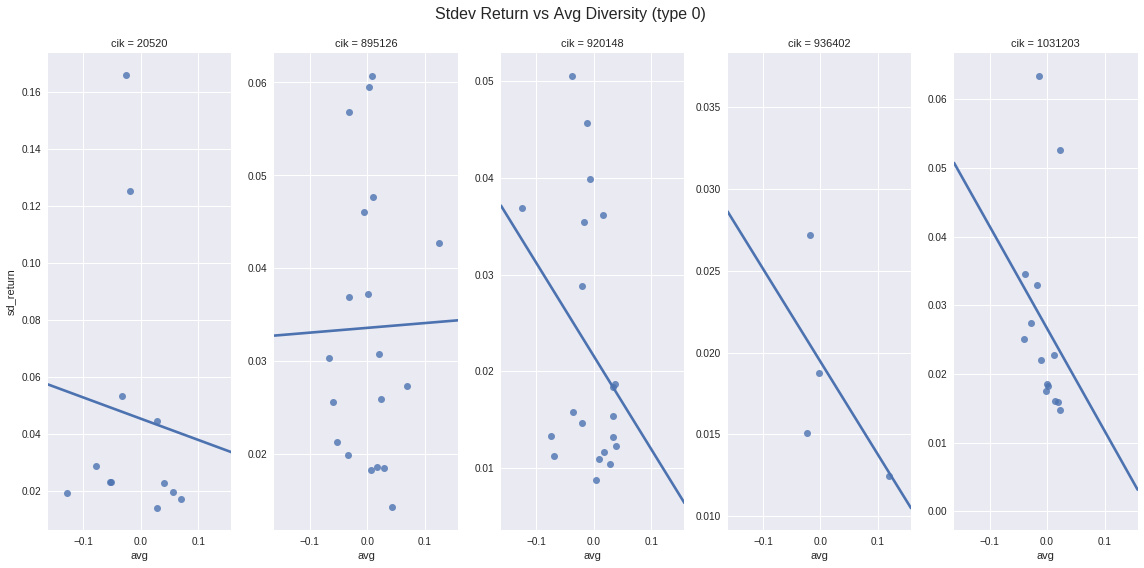

In [445]:
createChartPerCik(dd, mkt_type="sd_return", avg_type="0", label="Stdev Return")

### Case 2.2: Correlation between distances and volume

Nothing significant.

r(   20520) =  0.313 -- p-value = 0.161	 [Nr. Observations = 12]
r(  895126) =  0.190 -- p-value = 0.218	 [Nr. Observations = 19]
r(  920148) =  0.443 -- p-value = 0.025	 [Nr. Observations = 20]
r(  936402) = -0.539 -- p-value = 0.230	 [Nr. Observations =  4]
r( 1031203) = -0.357 -- p-value = 0.105	 [Nr. Observations = 14]


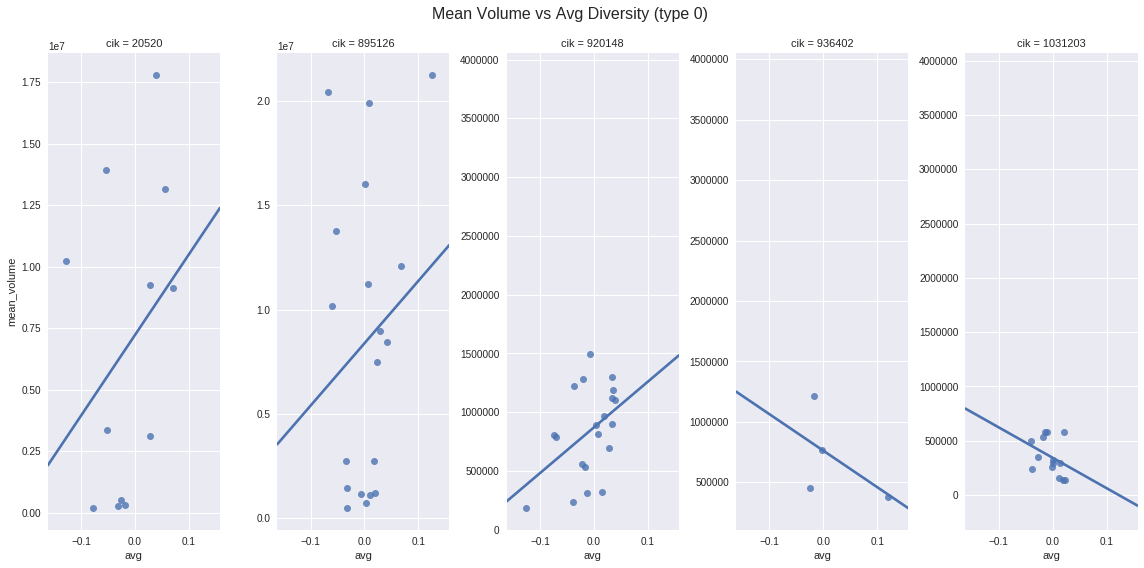

In [446]:
createChartPerCik(dd, mkt_type="mean_volume", avg_type="0", label="Mean Volume")

### Case 2.3: Correlation between distances and returns

Nothing significant here as well.

r(   20520) = -0.095 -- p-value = 0.385	 [Nr. Observations = 12]
r(  895126) = -0.273 -- p-value = 0.129	 [Nr. Observations = 19]
r(  920148) =  0.328 -- p-value = 0.079	 [Nr. Observations = 20]
r(  936402) = -0.437 -- p-value = 0.282	 [Nr. Observations =  4]
r( 1031203) =  0.129 -- p-value = 0.331	 [Nr. Observations = 14]


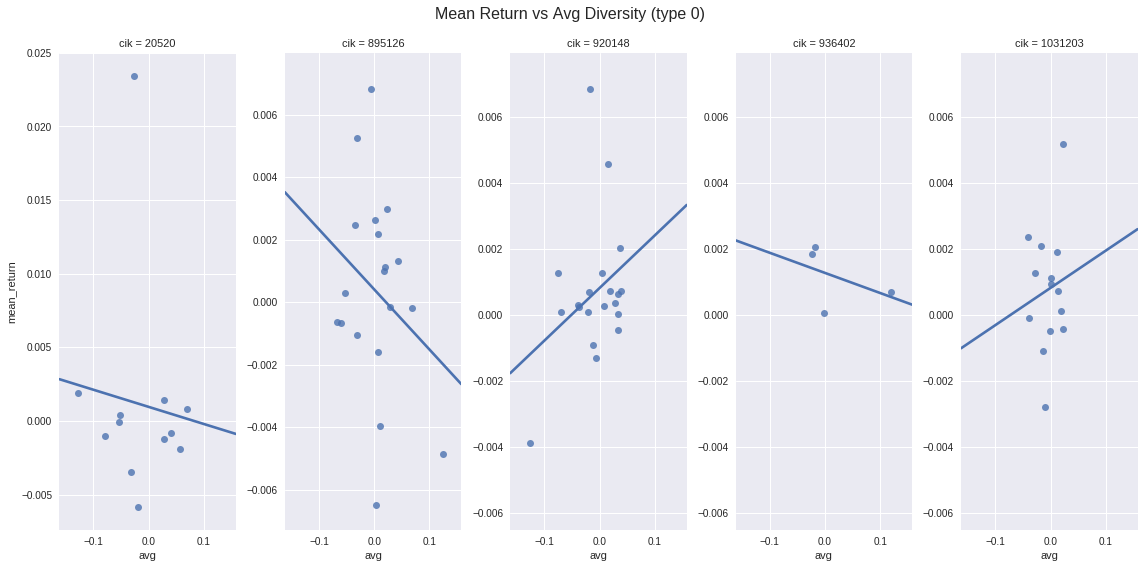

In [447]:
createChartPerCik(dd, mkt_type="mean_return", avg_type="0", label="Mean Return")

## Case 3: Correlation between type 0 chart (original, no differences) and compustat data

Here I use the original type 0 chart, the one that is computing the average intra-year distances, rather than the modified one (used in case 2 in this file). I am only plotting the correlation between the three market statistics and the average intra-year distances. As we can see from the chart, a mild negative correlation between returns and distances arises (as in the previous cases. Everything else seems not significant.

In [448]:
# Use these two lines to verify that the difference has been properly computed
#print(df0.loc[df0["cik"]==936402])
#print(df0diff.loc[df0diff["cik"]==936402])

In [449]:
df0["year"] = df0["year"].astype("int64")
df0["cik"] = df0["cik"].astype("int64")
comp["year"] = comp["year"].astype("int64")
comp["cik"] = comp["cik"].astype("int64")
dd = df0.merge(comp)
dd.head()

,avg,cik,tot,year,tic,sd_return,mean_return,mean_volume
0,0.300851,936402,86,2012,SHPG,0.012457,0.000700,3.826591e+05
1,0.276564,936402,155,2013,SHPG,0.015098,0.001830,4.542985e+05
2,0.258953,936402,86,2014,SHPG,0.027183,0.002046,1.217114e+06
3,0.256870,936402,54,2015,SHPG,0.018737,0.000043,7.671176e+05
4,0.381186,920148,2,1995,LH,0.026255,-0.002395,1.876665e+05


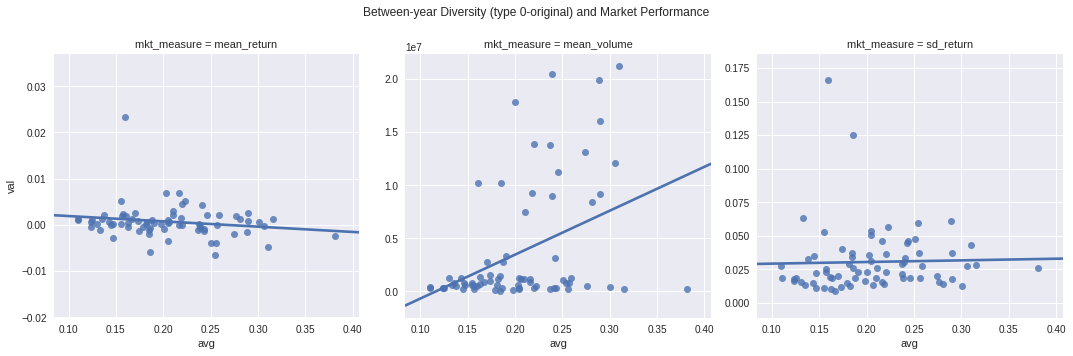

In [450]:
createGlobalChart(dd, label="Between-year Diversity (type 0-original)")

In [451]:
printCorrelations(dd)

Correlation between mean distances and mean_return 	= -0.180 	 (0.128)	
Correlation between mean distances and mean_volume 	=  0.414 	 (0.000)	
Correlation between mean distances and sd_return 	=  0.029 	 (0.807)	


## $\chi^2$ Test of Independence

Here we use a $\chi^2$ test of independence, to determine whether the change over two consecutive years (computed using the two different methods, i.e., type 0 and type 1) are independent. The test is as follows:
- $H_0$ : between and within year variabilities are independent
- $H_a$: between and within year variabilities are dependent

Note that, since we have a $p$-value $=0.81$, we __fail to reject__ $H_0$, i.e., there is not enough evidence to claim that the two sources of variation are dependent.

In [452]:
dfMerged = pd.merge(df0diff,df1, on=["cik","year"])
epsi = 0.01
dfMerged["within"] = np.where(dfMerged["avg_x"] > epsi, "LH", 
                              np.where(dfMerged["avg_x"] > -epsi, "EQ", "HL"))

dfAux = dfMerged[["cik","avg_y"]].copy()
zMean = lambda x: x-x.mean()
grouped = dfAux.groupby("cik")
transf = grouped.transform(zMean)
dfMerged["hl"] = transf

dfMerged["between"] = np.where(dfMerged["hl"] > 0.0, "H", "L")
dfMerged.head()
tt= pd.crosstab(dfMerged["within"],dfMerged["between"])
chi2, p, dof, ex= stats.chi2_contingency(tt, correction=False)
print("Chi-squared statistic = {0:5.3f}, with p-value = {1:5.3f} (df={2})".format(chi2, p, dof))

print("Expected Values :: \n")
print(ex)
print("Observed Values :: \n")
print(tt)



Chi-squared statistic = 0.415, with p-value = 0.813 (df=2)
Expected Values :: 

[[ 7.65  9.35]
 [18.9  23.1 ]
 [18.45 22.55]]
Observed Values :: 

between   H   L
within         
EQ        7  10
HL       18  24
LH       20  21
